<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/lasso_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [3]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [4]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
modelo= Pipeline([ ('scaler', StandardScaler()),
                    ('features', PolynomialFeatures()),
                     ('model',Lasso())
])

#Ya probe con varios alpha y grados de polinomio, fui dejando los que mas cerca estan de valores menores de MSE
grilla = GridSearchCV(modelo,
                      {'model__alpha':[0.0000001, 0.0000001], 'features__degree':[4,5]},
                      cv = 5, scoring="neg_mean_squared_error", verbose=3
                      )
grilla.fit(x_train,y_train)






Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] features__degree=4, model__alpha=1e-07 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1692.1720746908913, tolerance: 22.517471085757343
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  features__degree=4, model__alpha=1e-07, score=-0.523, total=   3.0s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1685.176749004912, tolerance: 22.505430442501886
  positive)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV]  features__degree=4, model__alpha=1e-07, score=-0.520, total=   2.9s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1701.3850248378426, tolerance: 22.526711867972875
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.497, total=   3.0s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1677.996007996329, tolerance: 22.732826966993205
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.542, total=   3.0s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1666.5324636518244, tolerance: 22.604219755274258
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.551, total=   3.0s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1692.1720746908913, tolerance: 22.517471085757343
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.523, total=   2.9s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1685.176749004912, tolerance: 22.505430442501886
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.520, total=   3.0s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1701.3850248378426, tolerance: 22.526711867972875
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.497, total=   3.0s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1677.996007996329, tolerance: 22.732826966993205
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.542, total=   3.0s
[CV] features__degree=4, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1666.5324636518244, tolerance: 22.604219755274258
  positive)


[CV]  features__degree=4, model__alpha=1e-07, score=-0.551, total=   3.0s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1639.4384348196534, tolerance: 22.517471085757343
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.507, total=   9.9s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1629.5466720653046, tolerance: 22.505430442501886
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.508, total=   9.8s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1643.5204224826202, tolerance: 22.526711867972875
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.488, total=   9.8s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1628.5239770083763, tolerance: 22.732826966993205
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.520, total=   9.9s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1610.5666387485387, tolerance: 22.604219755274258
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.540, total=   9.9s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1639.4384348196534, tolerance: 22.517471085757343
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.507, total=   9.9s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1629.5466720653046, tolerance: 22.505430442501886
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.508, total=   9.9s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1643.5204224826202, tolerance: 22.526711867972875
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.488, total=   9.8s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1628.5239770083763, tolerance: 22.732826966993205
  positive)


[CV]  features__degree=5, model__alpha=1e-07, score=-0.520, total=   9.9s
[CV] features__degree=5, model__alpha=1e-07 ..........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1610.5666387485387, tolerance: 22.604219755274258
  positive)
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.1min finished


[CV]  features__degree=5, model__alpha=1e-07, score=-0.540, total=  10.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2046.2969962485452, tolerance: 28.222275307089475
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                           

In [6]:
grilla.best_params_

{'features__degree': 5, 'model__alpha': 1e-07}

4 0.5266369829964846
4 0.5266369829964846
5 0.5126781422100641
5 0.5126781422100641


Text(0, 0.5, 'RMSE en validacion')

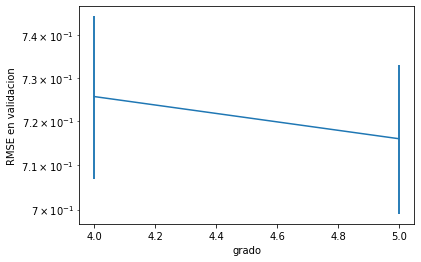

In [ ]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')


In [7]:
grilla.cv_results_['mean_test_score']

array([-0.52663698, -0.52663698, -0.51267814, -0.51267814])

In [8]:
grilla.best_score_

-0.5126781422100641

In [23]:
# Fit best model
modelo=grilla.best_estimator_
modelo.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2046.2969962485452, tolerance: 28.222275307089475
  positive)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('features',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Lasso(alpha=1e-07, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
print(modelo['model'].coef_)
print(modelo['model'].intercept_)

[ 0.00000000e+00  2.52962167e+00  6.52791582e-01  4.53691281e-01
 -5.64064430e-01  1.15611362e+00  1.74994951e-01  1.70673677e+00
 -2.36554651e-02  1.68271564e-01 -5.77774540e-01 -1.03844123e+00
  5.96898468e-01  7.90434543e-01 -7.32419427e-01 -8.03603873e-01
  2.93115799e-02  5.34670215e-01  7.51526869e-01 -3.73832269e-01
 -1.05510805e-01  5.40210779e-01  2.42785646e-01 -1.25057181e+00
 -3.18603248e-01 -1.01866729e+00  1.19689265e+00  5.52732268e-01
  1.27388175e+00  4.10484663e-01  4.19273395e-02  5.87755615e-01
  9.37269236e-02 -3.33140784e-01  3.76423037e-03 -5.17629329e-01
 -1.96533156e-01 -1.30337314e+00 -9.73801807e-01 -3.84011830e-01
  4.00586682e-01 -7.99929214e-02  3.69558321e-01  3.97910414e-02
  4.87871217e-01 -1.72789601e-01 -5.04920201e-01 -2.63198060e-01
 -3.21559411e-01 -3.46897489e-01 -1.42936656e-01  5.76928858e-02
 -1.35426210e-01 -1.94222135e-01  3.29544899e-02  2.81317323e-01
  2.81273142e-01 -1.13882175e-01 -2.39269988e-01 -1.28231496e-01
  1.02578341e-01  1.57601

In [10]:
y_pred_test = modelo.predict(x_test)
y_pred_test

array([24.50587135, 27.10307818, 14.89283627, ..., 33.92385958,
       27.84381183, 28.98818905])

In [11]:
y_test

1803     24.9
321      27.0
7317     14.7
8065     20.8
10056    14.1
         ... 
5684     16.6
8437     19.1
1897     34.2
5719     26.9
9508     28.6
Name: Temp_Alicia AgriculturaCba, Length: 2074, dtype: float64

In [29]:

print('Precisión del modelo usando el (MSE):')
score_testeo = mean_squared_error(y_test,y_pred_test)

print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.5254845318555748


In [13]:
#se puede usar scoring='neg_root_mean_squared_error' tambien que seria la raiz
MSE_modelo=cross_val_score(modelo,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
errores = -MSE_modelo
MSE_modelo



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.7639534358515, tolerance: 5.6231500578661855
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.95080948411123, tolerance: 5.680673046413503
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 379.3983135727891, tolerance: 5.638172509945751
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395.713633

array([-0.49350026, -0.53274968, -0.66959935, -0.5043624 , -0.65876705])

In [14]:
print(errores.mean(), errores.std())

0.5717957464522628 0.0765918869537276


Ahora se prueba con un set de datos final de la materia

In [15]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresiones_TP_UNSAM/main/base_datos_estaciones_met_V3_test.csv'
df = pd.read_csv(url, sep=",")
df.columns



Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [16]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [24]:
y_pred = modelo.predict(x)
y_pred

array([19.83130793, 19.78479439, 19.5475602 , ..., 14.34747667,
       14.29474961, 14.2588475 ])

In [30]:
y

0       19.7
1       19.4
2       19.1
3       18.9
4       18.8
        ... 
2587    14.4
2588    14.2
2589    14.1
2590    14.0
2591    13.9
Name: Temp_Alicia AgriculturaCba, Length: 2592, dtype: float64

In [26]:

print('Precisión del modelo usando el MSE):')
score_testeo = mean_squared_error(y_pred,y,squared=True)

print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.4424913341293918
